In [231]:
import numpy as np
import pandas as pd

In [232]:
import random

In [233]:
def generate_population(size, x_boundaries, y_boundaries):
    lower_x_boundary, upper_x_boundary = x_boundaries
    lower_y_boundary, upper_y_boundary = y_boundaries
    
    population = []
    for i in range(size):
        individual = {
            "x" : random.uniform(lower_x_boundary, upper_x_boundary),
            "y" : random.uniform(lower_y_boundary, upper_y_boundary),
        }
        population.append(individual)
        
    return population

In [426]:
import math

def apply_function(individual, verbose = False):
    global kkt
    x = individual["x"]
    y = individual["y"]
    function_value = 20 + x ** 2 + y **2 - 10 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))
    
    if kkt:
        kkt1 = x + 10 * math.pi * math.sin(2 * math.pi * x)
        kkt2 = y + 10 * math.pi * math.sin(2 * math.pi * y)
        penalty = abs(kkt1) + abs(kkt2)
        penalty_coef = 0.1
        return function_value + penalty_coef * (penalty if penalty > 1e-3 else 0)
    
    else:
        return function_value
    
    if verbose:
        if kkt:
            print('penalty is {}'.format(penalty))    
        print('function value is {}'.format(function_value))
    
#    print(20 + x ** 2 + y **2 - 10 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y)))

In [235]:
def sort_population_by_fitness(population):
    return sorted(population, key = apply_function)

In [236]:
def crossover(individual_a, individual_b):
    xa = individual_a["x"]
    ya = individual_a["y"]
    
    xb = individual_b["x"]
    yb = individual_b["y"]
    
    return {"x": (xa+xb)/2, "y": (ya+yb)/2}
def mutate(individual):
    global current_generation
    next_x = individual["x"] + random.uniform(-0.5, 0.5)
    next_y = individual["y"] + random.uniform(-0.5, 0.5)
    
    lower_boundary, upper_boundary = (-5.12, 5.12)
    
    next_x = min(max(next_x, lower_boundary), upper_boundary)
    next_y = min(max(next_y, lower_boundary), upper_boundary)
    
    return {"x": next_x, "y": next_y}

In [237]:
def make_next_generation(previous_population, elite=False, mutation_p = 0.1):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in previous_population)
    
    if elite:
        elite_size = int(population_size * 0.05) 
        for j in range(elite_size):
            next_generation.append(sorted_by_fitness_population[j])        
    
    for i in range(population_size):
        first_choice = choice_by_roulette(sorted_by_fitness_population)
        second_choice = choice_by_roulette(sorted_by_fitness_population)
        
        individual = crossover(first_choice, second_choice)
        
        mu = random.random()
        if mu < mutation_p:
            individual = mutate(individual)
            
        next_generation.append(individual)
        if len(next_generation) == population_size:
            break
            
    return next_generation    

In [238]:
def choice_by_roulette(sorted_population):
#    offset = 0
#    normalized_fitness_sum = fitness_sum
    
#    lowest_fitness = apply_function(sorted_population[0])
#    if lowest_fitness < 0:
#        offset = -lowest_fitness
#        normalized_fitness_sum += offset * len(sorted_population)
    conversion = lambda x: math.exp(-x/100)
    logistic_value = list(conversion(apply_function(i)) for i in sorted_population)
    logistic_sum = sum(i for i in logistic_value)
#    print(logistic_sum)
    draw = random.uniform(0,1)
    accumulated = 0
    for individual in sorted_population:
        fitness = conversion(apply_function(individual))
        probability = fitness / logistic_sum
        accumulated += probability
        
        if draw <= accumulated:
#            print('probability is {}'.format(probability))
            return individual
        

In [110]:
print(list(apply_function(indiv) for indiv in population))

[0.44803328843252643, 1.4399643628213035, 2.1384225860375636, 0.1659266131462971, 0.09899156734736536, 0.19478232234411053, 0.785174221643075, 1.3736311866809245, 0.6638076463026756, 0.4040842964016633, 0.01746792341847936, 0.46237806472055, 0.2914761187680348, 0.09842100033229073, 1.8600264920162246, 0.18886181148869952, 2.323020862809699, 0.41374139569909474, 1.1230981017639436, 0.3950355406814232, 0.03494005715648285, 0.6339078053049114, 1.0734487686567924, 1.2676020652685267, 0.44959808672455637, 0.7877045923052783, 0.10222229381208692, 2.9298976699192814, 0.4391816030187705, 1.191377985283765]


In [121]:
print(list(apply_function(i) for i in sort_population_by_fitness(population)))

[0.01746792341847936, 0.03494005715648285, 0.09842100033229073, 0.09899156734736536, 0.10222229381208692, 0.1659266131462971, 0.18886181148869952, 0.19478232234411053, 0.2914761187680348, 0.3950355406814232, 0.4040842964016633, 0.41374139569909474, 0.4391816030187705, 0.44803328843252643, 0.44959808672455637, 0.46237806472055, 0.6339078053049114, 0.6638076463026756, 0.785174221643075, 0.7877045923052783, 1.0734487686567924, 1.1230981017639436, 1.191377985283765, 1.2676020652685267, 1.3736311866809245, 1.4399643628213035, 1.8600264920162246, 2.1384225860375636, 2.323020862809699, 2.9298976699192814]


In [126]:
choice_by_roulette(sort_population_by_fitness(population))

probability is 0.0398640820649788


{'x': 0.04581061223478757, 'y': 0.0011124026974496937}

In [239]:
import matplotlib.pyplot as plt

In [242]:
apply_function(global_best_individual, verbose = True)

penalty is 0.1918383263990171
function value is 1.990087713700337


2.181926040099354


 Final Result
{'x': 0.0003879967884474027, 'y': 0.0012707194041828712} 0.03325755656678567


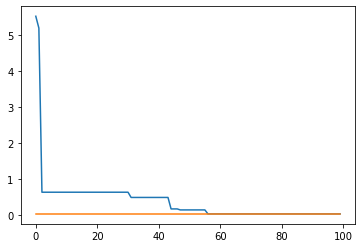

In [262]:
generations = 100
kkt = True
population = generate_population(size = 50, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function(global_best_individual) > apply_function(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function(best_individual))
    if i == generations:
        break
    i += 1
    
    population = make_next_generation(population, elite=True)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
print(global_best_individual, apply_function(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function(global_best_individual))


 Final Result
{'x': 0.0010984591567822083, 'y': 1.5401717390301634e-05} 0.00023942849280089717


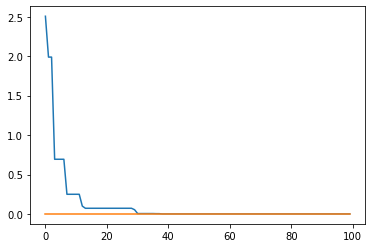

In [257]:
generations = 100
kkt = False
population = generate_population(size = 50, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function(global_best_individual) > apply_function(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function(best_individual))
    if i == generations:
        break
    i += 1
    
    population = make_next_generation(population, elite=True)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
print(global_best_individual, apply_function(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function(global_best_individual))

In [224]:
global_best_individual

{'x': 0.9948285950746218, 'y': -0.9951124561149969}

In [3]:
import random

In [98]:
def BlendCrossover(individual1, individual2, alpha, **keywards):
    '''
    keywards can include: 
    upper: array
    lower: array
    '''    
    
    x_lower = individual1["x"] - alpha * (individual2["x"] - individual1["x"])
    x_upper = individual2["x"] + alpha * (individual2["x"] - individual1["x"])
    y_lower = individual1["y"] - alpha * (individual2["y"] - individual1["y"])
    y_upper = individual2["y"] + alpha * (individual2["y"] - individual1["y"])
    x_sample = random.random() * (x_upper - x_lower) + x_lower
    y_sample = random.random() * (y_upper - y_lower) + y_lower
    
    for keys, values in keywards.items():
        if keys == "upper":
            if x_sample > values[0]:
                x_sample = values[0]
            elif y_sample > values[1]:
                y_sample = values[1]
        if keys == "lower":
            if x_sample < values[0]:
                x_sample = values[0]
            elif y_sample < values[1]:
                y_sample = values[1]            
    
    return {"x": x_sample, 
            "y": y_sample}

In [104]:
def SimulatedBinaryCrossover(individual1, individual2, n, **keywards):
    u = random.random()
    if u < 0.5:
        beta = ( 2 * u ) ** (1/(n+1))
    else:
        beta = (1 / (2*(1-u)))**(1/(n+1))
        
    xy1 = np.array([individual1.get('x'), individual1.get('y')])
    xy2 = np.array([individual2.get('x'), individual2.get('y')])
    offspring1 = (1+beta) * xy1 + (1-beta) * xy2
    offspring1 = offspring1 * 0.5
    offspring2 = (1-beta) * xy1 + (1+beta) * xy2
    offspring2 = offspring2 * 0.5

    for keys, values in keywards.items():
        if keys == "upper":
            if offspring1[0] > values[0]:
                offspring1[0] = values[0]
            
            if offspring1[1] > values[1]:
                offspring1[1] = values[1]

            if offspring2[0] > values[0]:
                offspring2[0] = values[0]

            if offspring2[1] > values[1]:
                offspring2[1] = values[1]
                
        if keys == "lower":
            if offspring1[0] < values[0]:
                offspring1[0] = values[0]
            
            if offspring1[1] < values[1]:
                offspring1[1] = values[1]

            if offspring2[0] < values[0]:
                offspring2[0] = values[0]

            if offspring2[1] < values[1]:
                offspring2[1] = values[1]    
    
    dict_offspring1 = {'x': offspring1[0], 'y':offspring1[1]}
    dict_offspring2 = {'x': offspring2[0], 'y':offspring2[1]}    
    
    return dict_offspring1, dict_offspring2

In [17]:
population = generate_population(size = 2, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

In [100]:
kwargs= {"lower": [0,0], "upper": [3,3]}

In [103]:
BlendCrossover(population[0], population[1], 1, **kwargs)

{'x': 2.7297671288280183, 'y': 3}

In [83]:
BlendCrossover(population[0], population[1], 0.5)

{'x': 1.6949767089214194, 'y': 0.010873970615159934}

In [115]:
SimulatedBinaryCrossover(population[0], population[1], 0.5, lower = [0,0], upper = [1,1])

({'x': 1.0, 'y': 1.0}, {'x': 1.0, 'y': 1.0})

In [80]:
list(population[0].items())

[('x', 2.255741968604399), ('y', 3.1854867849660122)]

In [138]:
def make_two_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in previous_population)
    
    for i in range(population_size//2):
        first_choice = choice_by_roulette(sorted_by_fitness_population)
        second_choice = choice_by_roulette(sorted_by_fitness_population)
        
        individual1, individual2 = SimulatedBinaryCrossover(first_choice, second_choice, 5, lower = [-5.12, -5.12], upper=[5.12,5.12])
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        next_generation.append(individual1)
        if len(next_generation) == population_size:
            break
        next_generation.append(individual2)
                
    return next_generation    


 Final Result
{'x': 0.0047393041844958905, 'y': 0.0032253235153394885} 0.006519503342321542


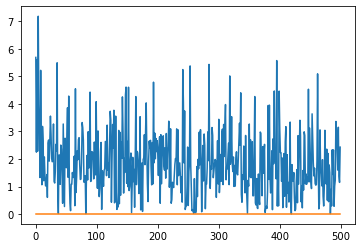

In [176]:
generations = 500

population = generate_population(size = 60, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function(global_best_individual) > apply_function(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function(best_individual))
    if i == generations:
        break
    i += 1
    
    population = make_two_next_generation(population)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
print(global_best_individual, apply_function(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function(global_best_individual))


 Final Result
{'x': 2.986604740542235, 'y': -0.9958945864762102} 63.07187929437986


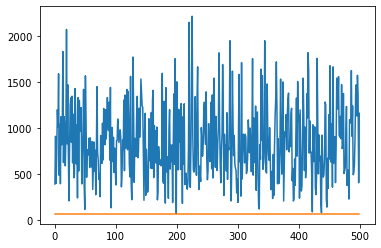

In [198]:
generations = 500

population = generate_population(size = 60, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function(global_best_individual) > apply_function(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function(best_individual))
    if i == generations:
        break
    i += 1
    
    population = make_two_next_generation(population)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
print(global_best_individual, apply_function(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function(global_best_individual))

# DE Algorithm 

In [273]:
# Auxiliary function to make array from dictionary
def dict_to_valuearray(dictionary):
    values = np.array(list(dictionary.values()))
    return values       

In [274]:
a = {'x':3, 'y':4}

dict_to_valuearray(a)

array([3, 4])

In [430]:
random.sample([0,1,2,3],3)

[0, 1, 3]

In [431]:
def testfunction(a):
    return a * 10

In [439]:
aaa = [0,1,2,3]
bbb = list(map(testfunction, aaa))

max_value = max(bbb)
max_index = bbb.index(max_value)
print(max_index)
#print(ccc)

3


In [483]:
# Initial Population generation
# NP population, D-dimension

# Mutation_DE
def mutation_DE(population, F = 1, best = False):
# one generation of mutation
    mutant_population = []
    # if best is true, pick the best vector
    if best:
        fitness_value = list(map(apply_function_general, population))
        max_value = max(fitness_value)
        max_index = fitness_value.index(max_value)
    # pick 3 random indexes for r1,r2,r3
    for i in range(len(population)):
        if best:
            r1_index = max_index
        else:
            r1_index = random.randint(0,len(population)-1)            
        while True:
            r2_index = random.randint(0,len(population)-1)
            if r2_index != r1_index:
                break
        while True:
            r3_index = random.randint(0, len(population)-1)
            if r3_index != r1_index and r3_index != r2_index:
                break
        # retrive their vector 
        r1_array = dict_to_valuearray(population[r1_index])
        r2_array = dict_to_valuearray(population[r2_index])
        r3_array = dict_to_valuearray(population[r3_index])

        # apply mutation 
        mutant = r1_array + F * (r2_array - r3_array)
        # convert to dictionary
        mutant_dic = {}
        for k, v in zip(population[r1_index].keys(), mutant):
            mutant_dic[k] = v
        # append to the list
        mutant_population.append(mutant_dic)
    return mutant_population    
        
# Crossover_DE
def crossover_DE(population, mutant_population, CR=0.01):
    new_population = []
    for i in range(len(population)):
        pop = population[i] # original population
        mut = mutant_population[i] # mutanted population
        # pick at least one dimension to change with mutant value
        random_dimension = random.sample(list(population[0].keys()),1)[0] 
        new_pop_dict = {}
        for j in pop.keys():
            random_value = random.random()
            # if random value is less than crossover constant, adopt mutant value
            if random_value <= CR:
                new_pop_dict[j] = mut[j]
            # if index is the one that should be changed,
            elif j == random_dimension:
                new_pop_dict[j] = mut[j]
            # if nothing applies, select the original vector
            else:
                new_pop_dict[j] = pop[j]
        new_population.append(new_pop_dict)
    return new_population

# Selection
def selection_DE(population, trial):
    new_population = []
    for i in range(len(population)):
        # if fitness value is higher in trial vector, use that vector
        if apply_function_general(population[i]) > apply_function_general(trial[i]):
            new_population.append(trial[i])
        else:
            new_population.append(population[i])
    return new_population


 Final Result
{'x': 2.518125130634985e-08, 'y': -3.406011472861792e-08} 3.552713678800501e-13


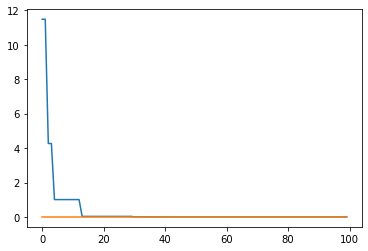

In [450]:
generations = 100
kkt= False

population = generate_population(size = 30, x_boundaries=(-5.12,5.12), y_boundaries=(-5.12,5.12))

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function(global_best_individual) > apply_function(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function(best_individual))
    if i == generations:
        break
    i += 1
    
#    mutant = mutation_DE(population, best = True) # to use best vector as a base for search vector 
    mutant = mutation_DE(population, best = False)
    trial = crossover_DE(population, mutant)
    population = selection_DE(population, trial)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
print(global_best_individual, apply_function(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function(global_best_individual))

It is very interesting that DE works extremely well even without any bounds on the variables (no cut off is applied).

In [451]:
population

[{'x': 5.517623709039299e-07, 'y': 6.166356314452059e-10},
 {'x': -1.4886217591936202e-08, 'y': 8.527080632703132e-07},
 {'x': 8.852393484914955e-08, 'y': -4.517277796267649e-07},
 {'x': 5.457537799458123e-08, 'y': -6.405311880897102e-08},
 {'x': -1.426801543580325e-07, 'y': -3.432000181824435e-07},
 {'x': 5.685027915092178e-08, 'y': 4.511474911872426e-06},
 {'x': 2.518125130634985e-08, 'y': -3.406011472861792e-08},
 {'x': 2.0493871932814045e-08, 'y': 1.3495989064082892e-06},
 {'x': -2.4518556607233677e-07, 'y': -9.224278065822489e-07},
 {'x': -1.3143903210277585e-07, 'y': 5.877664044362518e-08},
 {'x': 2.786867101534085e-07, 'y': 6.576122224544179e-08},
 {'x': 3.4660960679389063e-07, 'y': -2.1338613365173842e-07},
 {'x': 8.612980417765925e-08, 'y': -9.47542310836269e-07},
 {'x': 5.330621455357232e-08, 'y': 2.667739131823055e-07},
 {'x': -1.4159672545588364e-08, 'y': 4.452836206425559e-07},
 {'x': 5.8004840930436785e-08, 'y': 2.6273881648108954e-07},
 {'x': -1.348684950386314e-07, 'y':

In [460]:
def generate_population_general(size, dimension, upper, lower):
    
    population = []
    for i in range(size):
        individual= {}
        for j in range(dimension):
            dictkey = 'x' + str(j)
            individual[dictkey] = random.uniform(lower, upper)
        population.append(individual)
        
    return population

In [462]:
generate_population_general(3,2,-5,5)

[{'x0': -2.0657510124643066, 'x1': -3.2105642142765927},
 {'x0': -0.6648176172193656, 'x1': -1.2254248640808774},
 {'x0': 1.6437055615815632, 'x1': -0.38325597773709674}]

In [500]:
import math

def apply_function_general(individual, verbose = False):
#    function_value = 20 + x ** 2 + y **2 - 10 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))
    function_value = 10 * len(individual.values())+ sum(x ** 4 for x in individual.values()) - 10 * (sum(math.cos(2*math.pi*x) for x in individual.values()))
    return function_value


In [479]:
def sort_population_by_fitness(population):
    return sorted(population, key = apply_function_general)

In [475]:
popp = generate_population_general(3,2,-5,5)
apply_function_general(popp[2])

32.51920889446865


 Final Result
0.0001516137998009981


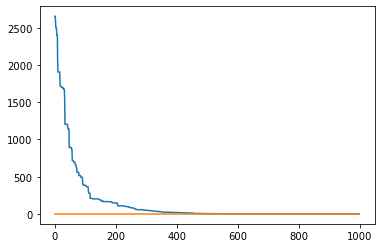

In [501]:
generations = 1000
kkt= False

population = generate_population_general(size = 30, dimension=30, upper=5.12, lower=-5.12)

i = 1
performance = []
global_best_individual = sort_population_by_fitness(population)[0]

while True:
#    print("Generation {}".format(i))
#    for individual in population:
#        print(individual)
    current_generation = i
    best_individual = sort_population_by_fitness(population)[0]
    if apply_function_general(global_best_individual) > apply_function_general(best_individual):
        global_best_individual = best_individual
    
#    print("\n Best in Generation {}".format(i))
#    print(best_individual, apply_function(best_individual))
    performance.append(apply_function_general(best_individual))
    if i == generations:
        break
    i += 1
    
#    mutant = mutation_DE(population, best = True) # to use best vector as a base for search vector 
    mutant = mutation_DE(population, best = False)
    trial = crossover_DE(population, mutant)
    population = selection_DE(population, trial)
    
#best_individual = sort_population_by_fitness(population)[0]
print("\n Final Result")
#print(global_best_individual)
print(apply_function_general(global_best_individual))
plt.plot(performance)
plt.plot(np.ones(len(performance)) * apply_function_general(global_best_individual))